In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import task_complexity
import matplotlib.pyplot as plt
import numpy as np

In [2]:
noise_level = 0.0
x_vals = torch.Tensor(np.sort(5*torch.randn(1000)))
y_vals = torch.sin(x_vals) + noise_level*torch.randn(1000)

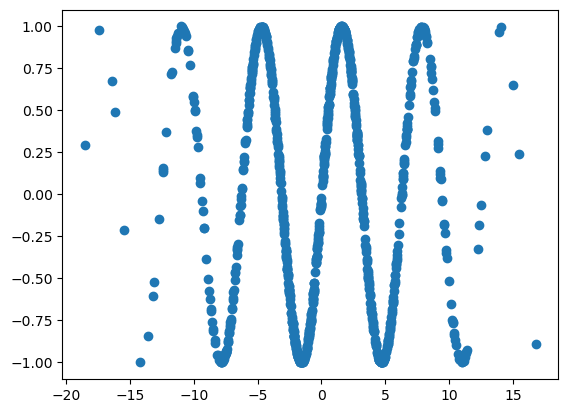

In [3]:
plt.scatter(x_vals, y_vals)

In [4]:
trainloader = torch.utils.data.DataLoader(list(zip(x_vals, y_vals)), batch_size = 1)

In [5]:
class Net_Sin_Data_No_Periodic(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        self.relu = nn.ReLU(inplace = True)
        self.fc2 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
class Net_Sin_Data_Periodic(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        self.fc2 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.fc1(x)
        # Include a periodic Activation function
        x = torch.cos(x)
        x = self.fc2(x)
        return x

In [6]:
criterion = nn.MSELoss()

In [7]:
mi_score_no_periodic = task_complexity.compute_complexity(Net_Sin_Data_No_Periodic, 10, trainloader, criterion, n_bins = 100)
print(f"Score Without Periodic Activation: {mi_score_no_periodic}")

Score Without Periodic Activation: 0.24733084480429812


In [8]:
mi_score_periodic = task_complexity.compute_complexity(Net_Sin_Data_Periodic, 10, trainloader, criterion, n_bins = 100)
print(f"Score With Periodic Activation: {mi_score_periodic}")

Score With Periodic Activation: 0.23118784758266742


In [9]:
nonperiodic_examples = []
periodic_examples = []
for trial in range(100):
    print(f"Trial: {trial}")
    x_vals = torch.Tensor(np.sort(5*torch.randn(1000)))
    y_vals = torch.sin(x_vals) + noise_level*torch.randn(1000)
    trainloader = torch.utils.data.DataLoader(list(zip(x_vals, y_vals)), batch_size = 1)

    mi_score_no_periodic = task_complexity.compute_complexity(Net_Sin_Data_No_Periodic, 10, trainloader, criterion, n_bins = 100)
    nonperiodic_examples.append(mi_score_no_periodic)
    mi_score_periodic = task_complexity.compute_complexity(Net_Sin_Data_Periodic, 10, trainloader, criterion, n_bins = 100)
    periodic_examples.append(mi_score_periodic)

Trial: 0
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Trial: 31
Trial: 32
Trial: 33
Trial: 34
Trial: 35
Trial: 36
Trial: 37
Trial: 38
Trial: 39
Trial: 40
Trial: 41
Trial: 42
Trial: 43
Trial: 44
Trial: 45
Trial: 46
Trial: 47
Trial: 48
Trial: 49
Trial: 50
Trial: 51
Trial: 52
Trial: 53
Trial: 54
Trial: 55
Trial: 56
Trial: 57
Trial: 58
Trial: 59
Trial: 60
Trial: 61
Trial: 62
Trial: 63
Trial: 64
Trial: 65
Trial: 66
Trial: 67
Trial: 68
Trial: 69
Trial: 70
Trial: 71
Trial: 72
Trial: 73
Trial: 74
Trial: 75
Trial: 76
Trial: 77
Trial: 78
Trial: 79
Trial: 80
Trial: 81
Trial: 82
Trial: 83
Trial: 84
Trial: 85
Trial: 86
Trial: 87
Trial: 88
Trial: 89
Trial: 90
Trial: 91
Trial: 92
Trial: 93
Trial: 94
Trial: 95
Trial: 96
Trial: 97
Trial: 98
Trial: 99


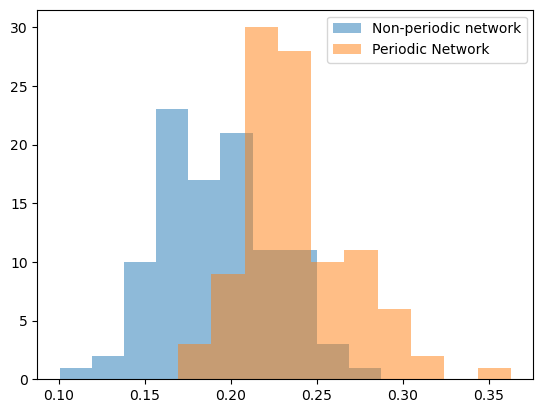

In [12]:
plt.hist(nonperiodic_examples, alpha = 0.5, label = "Non-periodic network")
plt.hist(periodic_examples, alpha = 0.5, label = "Periodic Network")
plt.legend(loc = "upper right")

Text(0, 0.5, 'Periodic MI Value')

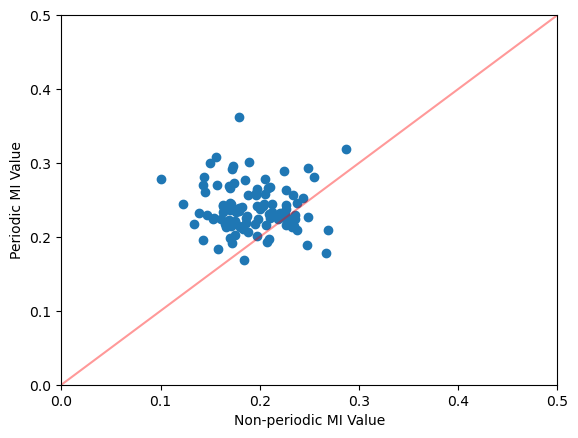

In [13]:
plt.scatter(nonperiodic_examples, periodic_examples)
vals = np.linspace(0.00, 0.5, 100)
plt.plot(vals, vals, color = "red", alpha = 0.4)
plt.xlim(0.00, 0.5)
plt.ylim(0.00, 0.5)
plt.xlabel("Non-periodic MI Value")
plt.ylabel("Periodic MI Value")